In [2]:
import pandas as pd
from google.colab import drive
import numpy as np

drive.mount("/content/drive")

data=pd.read_csv("/content/drive/MyDrive/NeutralNetwork/train.csv")

Mounted at /content/drive


In [3]:
data=np.array(data)
np.random.shuffle(data)

data_test=data[:1000]
data_X=data_test.T[1:]/255.
data_y=data_test.T[0]

data=data[1000:]
data

array([[6, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [4]:
data=data.T
data

array([[6, 7, 2, ..., 9, 1, 8],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
n,m=data.shape
Ytrain=data[0]
Xtrain=data[1:]
Ytrain

array([6, 7, 2, ..., 9, 1, 8])

In [6]:
X=Xtrain/255

In [7]:
X.max()

1.0

In [8]:
Xtrain=X
Xtrain.shape

(784, 41000)

In [9]:
Xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
Ytrain=Ytrain.T

Truth Value: 6


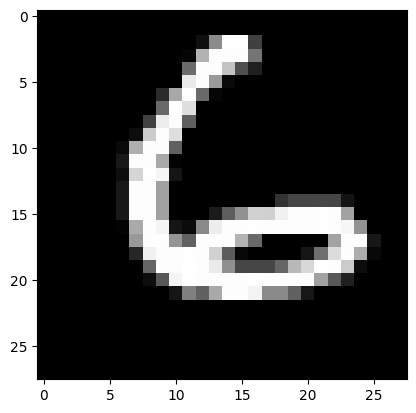

In [76]:
from matplotlib import pyplot as plt
plt.imshow(Xtrain.T[0].reshape((28,28)),cmap='gray')
print("Truth Value:",Ytrain[0])


In [114]:
def init_para():

  W_1 = np.random.rand(10,784) - 0.5
  B_1 = np.random.rand(10,1) - 0.5
  W_2 = np.random.rand(10,10) - 0.5
  B_2 = np.random.rand(10,1) - 0.5
  W_3 = np.random.rand(10,10) - 0.5
  B_3 = np.random.rand(10,1) - 0.5
  return W_1,B_1,W_2,B_2,W_3,B_3
def ReLu(Z_1):
    A = np.maximum(Z_1,0)
    return A
def tanH(X):
  A=np.exp(X)-np.exp(-X)/ np.exp(X)+np.exp(-X)

  return np.tanh(X)

def derv_tanH(X):
  A= np.divide(4,np.power(np.exp(X)+np.exp(-X),2))
  return A

def softmax(Z):

    A=np.exp(Z)/ sum(np.exp(Z))
    return A
def forward_pass(W_1,W_2,B_1,B_2,W_3,B_3,X):

  Z_1 = W_1.dot(X)  + B_1
  # print(Z_1)
  A_1 = ReLu(Z_1)

  Z_2 = W_2.dot(A_1)  + B_2

  A_2 = ReLu(Z_2)

  Z_3 = W_3.dot(A_2)  + B_3

  A_3 = softmax(Z_3)

  return Z_1,A_1,Z_2,A_2,Z_3,A_3


def oneHotY(Y):

  oneShot=np.zeros((Y.size,Y.max()+1))
  oneShot[np.arange(Y.size),Y]=1
  oneShot=oneShot.T
  return oneShot
def dervReLu(X):
  return X  > 0


def back_Prop(Z_1, A_1, Z_2, A_2, Z_3,A_3, W_1, W_2,W_3, X, Y):
  one_shotY = oneHotY(Y)
  m=Y.shape[0]


  dZ3 = A_3 - one_shotY

  dW3 = 1/m * dZ3.dot(A_2.T)
  dB3 = 1/m * np.sum(dZ3)

  dZ2 = W_3.T.dot(dZ3)*dervReLu(Z_2)
  dW2 = 1/m * dZ2.dot(A_1.T)
  dB2 = 1/m * np.sum(dZ2)


  dZ1 = W_2.T.dot(dZ2)*dervReLu(Z_1)
  dW1 = 1/m * dZ1.dot(X.T)
  dB1 = 1/m * np.sum(dZ1)



  #print(Z_1.shape, A_1.shape, Z_2.shape, A_2.shape, W_1.shape, W_2.shape, X.shape, Y.shape)
  # dZ2 = A_2 - one_shotY

  # dW2 = 1/m * dZ2.dot(A_1.T)
  # dB2 = 1/m * np.sum(dZ2)
  # dZ1 = W_2.T.dot(dZ2)*derv_tanH(Z_1)

  # dW1 = 1/m * dZ1.dot(X.T)
  # dB1 = 1/m * np.sum(dZ1)


  return dW1,dW2,dW3,dB1,dB2,dB3


def update_pra(W_1,B_1,W_2,B_2,W_3,B_3,dW1,dW2,dW3,dB1,dB2,dB3,a):
  #print(W_1.shape,W_2.shape,B_1.shape,B_2.shape)
  W_1=W_1 - a * dW1
  B_1=B_1 - a * dB1
  W_2=W_2 - a * dW2
  B_2=B_2 - a * dB2
  W_3=W_3 - a * dW3
  B_3=B_3 - a * dB3
  #print(W_1.shape,W_2.shape,B_1.shape,B_2.shape)
  return W_1,B_1,W_2,B_2,W_3,B_3

def get_predict(A_3):
  return np.argmax(A_3,0)
def get_accuracy(pred,X):
  return np.sum(pred==X)/X.size

def gradient_pred(X,Y,epoch,a):
  W_1,B_1,W_2,B_2,W_3,B_3 = init_para()

  for i in range(epoch):

    Z_1,A_1,Z_2,A_2,Z_3,A_3 = forward_pass(W_1,W_2,B_1,B_2,W_3,B_3,X)
    dW1,dW2,dW3,dB1,dB2,dB3 = back_Prop(Z_1, A_1, Z_2, A_2, Z_3,A_3, W_1, W_2,W_3, X, Y)
    W_1,B_1,W_2,B_2,W_3,B_3 = update_pra(W_1,B_1,W_2,B_2,W_3,B_3,dW1,dW2,dW3,dB1,dB2,dB3,a)
    print("Iteration  : ",i)
    print("Predicted :",get_predict(A_3))
    print("True Value :",Y)
    print("Accuracy :",get_accuracy(get_predict(A_3),Y))

  return W_1,B_1,W_2,B_2,W_3,B_3








In [115]:
W_1,B_1,W_2,B_2,W_3,B_3=gradient_pred(Xtrain,Ytrain,700,0.2)

Iteration  :  0
Predicted : [6 2 4 ... 2 4 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.08595121951219512
Iteration  :  1
Predicted : [5 1 4 ... 2 4 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.10378048780487804
Iteration  :  2
Predicted : [5 1 4 ... 2 4 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.11492682926829269
Iteration  :  3
Predicted : [5 1 4 ... 2 5 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.12158536585365853
Iteration  :  4
Predicted : [5 6 4 ... 2 5 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.12841463414634147
Iteration  :  5
Predicted : [5 7 4 ... 2 5 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.13639024390243903
Iteration  :  6
Predicted : [5 7 4 ... 2 5 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.14514634146341462
Iteration  :  7
Predicted : [5 7 4 ... 2 5 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.16107317073170732
Iteration  :  8
Predicted : [5 7 4 ... 2 5 4]
True Value : [6 7 2 ... 9 1 8]
Accuracy : 0.1807560975609756
Iteration  :  9
Predicted : [

In [118]:
def make_prediction(W_1,B_1,W_2,B_2,W_3,B_3,X_dev):
  _,_,_,_,_,A3=forward_pass(W_1,W_2,B_1,B_2,W_3,B_3,X_dev)
  pred=np.zeros(A3.size)
  pred[np.argmax(A3,0)[0]]=1
  return np.argmax(A3,0),pred

def test_prediction(X,Y):

  return np.sum(X==Y)/X.size
num,pred=make_prediction(W_1,B_1,W_2,B_2,W_3,B_3,data_X[:,1,None])

Predicted Value: 1
Accuracy Rate: 8.2
Predicted Value: 4
Accuracy Rate: 8.2


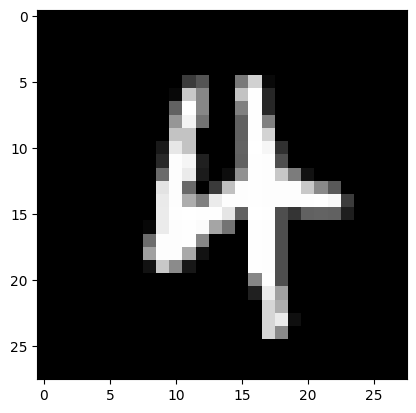

In [119]:
from time import sleep
def prediction(X,Y,index):

  num,pred=make_prediction(W_1,B_1,W_2,B_2,W_3,B_3,X[:,index,None])
  Y=oneHotY(Y)
  accur=test_prediction(pred,Y[:,index,None])

  print("Predicted Value:",num[0])
  print("Accuracy Rate:",accur)

  plt.imshow(X[:,index,None].reshape(28,28),cmap='gray')


prediction(data_X,data_y,2)

prediction(data_X,data_y,80)


In [100]:
with open("/content/drive/MyDrive/NeutralNetwork/Weights.txt","w") as f:
  f.write("W1:"+str(W_1)+"\t"+"W2:"+str(W_2)+"\t"+"B1:"+str(B_1)+"\t"+"B2:"+str(B_2))
  f.close()

(784,)